In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [2]:
headway_df = pd.read_csv('..\Data\headway_data_with_datetimes.csv')

In [3]:
headway_df.iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN
5,120230801,1,99457895,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN
6,120230801,1,99457896,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0


In [4]:
headway_df.iloc[0:30,20:]

,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS
0,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME
1,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,2023-08-01 - 345104,22,ON TIME
2,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,2023-08-01 - 345104,22,ON TIME
3,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,2023-08-01 - 345104,22,ON TIME
4,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME
5,NaN,NaN,0,0,1,0,0.0,0,51,0.000000,2023-08-01 - 345105,22,ON TIME
6,NaN,NaN,0,0,1,0,NaN,0,62,0.000000,2023-08-01 - 345105,22,ON TIME
7,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,2023-08-01 - 345106,22,ON TIME
8,36.966666,1.966666,0,0,1,0,0.0,0,70,0.000000,2023-08-01 - 345106,22,ON TIME
9,14.516666,-0.483334,0,0,1,0,0.0,0,80,0.000000,2023-08-01 - 345106,22,ON TIME


In [5]:
trip_id_list = headway_df['TRIP_ID']
trip_id_list_unique = trip_id_list.unique()
len(trip_id_list_unique)

3987

In [6]:
calendar_id_list = headway_df['CALENDAR_ID']
calendar_id_list_unique = calendar_id_list.unique()
print(calendar_id_list_unique)

[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]


In [7]:
headway_df['SCHEDULED_TIME']=pd.to_datetime(headway_df['SCHEDULED_TIME'])

In [8]:
headway_df['ACTUAL_ARRIVAL_TIME']=pd.to_datetime(headway_df['ACTUAL_ARRIVAL_TIME'])

In [9]:
headway_df['ACTUAL_DEPARTURE_TIME']=pd.to_datetime(headway_df['ACTUAL_DEPARTURE_TIME'])

In [10]:
#headway_df['DATE']=pd.to_datetime(headway_df['DATE']).dt.date

In [11]:
#Old loop for sequence order and datetimes using headway_data_with_routes.csv

# start_time = time.time()
# headway_df_adj = pd.DataFrame(None)
# for day in calendar_id_list_unique:    
#     sched_start_dict = {}
#     actual_start_dict = {}
#     headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
#     headway_df_day = headway_df_day.reset_index(drop=True)
#     for i in range(len(headway_df_day)):
#         if headway_df_day.loc[i,'TRIP_EDGE'] == 1:
#             headway_df_day.loc[i,'ROUTE_START_SEQ'] = headway_df_day.loc[i,'ROUTE_STOP_SEQUENCE']
#             try:
#                 sched_start_dict.update({headway_df_day.loc[i,'TRIP_ID']:datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'SCHEDULED_TIME'])})
#             except:
#                 pass
            
#             try:
#                 actual_start_dict.update({headway_df.loc[i,'TRIP_ID']:datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'])})
#             except:
#                 pass        
#         else:
#             headway_df_day.loc[i,'ROUTE_START_SEQ'] = np.nan
    
#     #Scheduled time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'SCHEDULED_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'SCHEDULED_TIME'])
#         except:
#             pass
        
#     #Actual Arrival Time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ACTUAL_ARRIVAL_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_ARRIVAL_TIME'])
#         except:
#             pass
  
#     #Actual Departure Time now datetime
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'] = datetime.combine(headway_df_day.loc[i,'DATE'],headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME'])
#         except:
#             pass

#     #Scheduled Trip Start Time
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ROUTE_SCHED_START'] = sched_start_dict[headway_df_day.loc[i,'TRIP_ID']]
#         except:
#             pass
    
#     #Actual Trip Start Time
#     for i in range(len(headway_df_day)):
#         try:
#             headway_df_day.loc[i,'ROUTE_ACTUAL_START'] = actual_start_dict[headway_df_day.loc[i,'TRIP_ID']]
#         except:
#             pass
    
#     #Sequence adjustment
#     route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
#     route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
#     for i in range(len(headway_df_day)):
#         headway_df_day.loc[i,'ROUTE_START_SEQ'] = route_start_dict[headway_df_day.loc[i,'TRIP_ID']]
    
#     if headway_df_adj.empty:
#         headway_df_adj = headway_df_day.copy()
#     else:
#         headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
#     print(f'{day} day is done compiling.')

# print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
# headway_df_adj.iloc[0:10,30:]

In [12]:
start_time = time.time()
headway_df_adj = pd.DataFrame(None)
for day in calendar_id_list_unique:    
    sched_start_dict = {}
    actual_start_dict = {}
    headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
    headway_df_day = headway_df_day.reset_index(drop=True)
    for i in range(len(headway_df_day)):
        if headway_df_day.loc[i,'TRIP_EDGE'] == 1:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = headway_df_day.loc[i,'ROUTE_STOP_SEQUENCE']
            try:
                sched_start_dict.update({headway_df_day.loc[i,'TRIP_ID']:headway_df_day.loc[i,'SCHEDULED_TIME']})
            except:
                pass
            
            try:
                actual_start_dict.update({headway_df.loc[i,'TRIP_ID']:headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME']})
            except:
                pass        
        else:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = np.nan
        

    #Scheduled Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_SCHED_START'] = sched_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Actual Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_ACTUAL_START'] = actual_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Sequence adjustment
    route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
    route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
    for i in range(len(headway_df_day)):
        headway_df_day.loc[i,'ROUTE_START_SEQ'] = route_start_dict[headway_df_day.loc[i,'TRIP_ID']]
    
    if headway_df_adj.empty:
        headway_df_adj = headway_df_day.copy()
    else:
        headway_df_adj = pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
    print(f'{day} day is done compiling.')

print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
headway_df_adj.iloc[0:10,30:]

120230801 day is done compiling.
120230802 day is done compiling.
120230803 day is done compiling.
120230804 day is done compiling.
120230805 day is done compiling.
120230806 day is done compiling.
120230807 day is done compiling.
120230808 day is done compiling.
120230809 day is done compiling.
120230810 day is done compiling.
120230811 day is done compiling.
120230812 day is done compiling.
120230813 day is done compiling.
120230814 day is done compiling.
120230815 day is done compiling.
120230816 day is done compiling.
120230817 day is done compiling.
120230818 day is done compiling.
120230819 day is done compiling.
120230820 day is done compiling.
120230821 day is done compiling.
120230822 day is done compiling.
120230823 day is done compiling.
120230824 day is done compiling.
120230825 day is done compiling.
120230826 day is done compiling.
120230827 day is done compiling.
120230828 day is done compiling.
120230829 day is done compiling.
120230830 day is done compiling.
120230831 

,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START
0,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
1,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
2,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
3,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08
4,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
5,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
6,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35
7,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43
8,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43
9,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43


In [13]:
headway_df_adj['STOP_SEQ_ADJ'] = abs(headway_df_adj['ROUTE_START_SEQ']-headway_df_adj['ROUTE_STOP_SEQUENCE'])+1
headway_df_adj.iloc[0:10,30:]

,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ
0,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,1.0
1,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,5.0
2,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,10.0
3,2023-08-01 - 345104,22,ON TIME,14.0,2023-08-01 04:42:00,2023-08-01 04:44:08,14.0
4,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,1.0
5,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,5.0
6,2023-08-01 - 345105,22,ON TIME,1.0,2023-08-01 05:15:00,2023-08-01 05:16:35,14.0
7,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,1.0
8,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,5.0
9,2023-08-01 - 345106,22,ON TIME,14.0,2023-08-01 05:42:00,2023-08-01 05:43:43,10.0


In [14]:
headway_df_adj[headway_df_adj['CALENDAR_ID']==120230808]['SCHEDULED_TIME'].dropna().sort_values()

40905   2023-08-08 04:20:00
44033   2023-08-08 04:23:00
40906   2023-08-08 04:29:00
44034   2023-08-08 04:30:00
45175   2023-08-08 04:30:00
                ...        
45052   2023-08-09 00:57:00
41578   2023-08-09 00:57:00
43264   2023-08-09 00:57:00
43265   2023-08-09 01:02:00
41579   2023-08-09 01:05:00
Name: SCHEDULED_TIME, Length: 6481, dtype: datetime64[ns]

In [15]:
headway_df_adj['ROUTE_ACTUAL_START'].isna().sum()

331775

In [16]:
headway_df_adj.tail(50)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ
350278,120230930,2,100406565,2023-09-30,HILLSBORO,702,2103,353433,0,FROM DOWNTOWN,...,0,179,0.000000,2023-09-30 - 353433,7,ON TIME,3.0,2023-09-30 11:45:00,NaT,2.0
350279,120230930,2,100406566,2023-09-30,HILLSBORO,702,2103,353433,0,FROM DOWNTOWN,...,0,193,0.000000,2023-09-30 - 353433,7,ON TIME,3.0,2023-09-30 11:45:00,NaT,3.0
350280,120230930,2,100406567,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,0,194,17.066666,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,1.0
350281,120230930,2,100406568,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,0,203,0.000000,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,2.0
350282,120230930,2,100406569,2023-09-30,HILLSBORO,702,2103,353434,0,TO DOWNTOWN,...,0,215,0.000000,2023-09-30 - 353434,7,ON TIME,5.0,2023-09-30 12:36:00,NaT,3.0
350283,120230930,2,100406570,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,0,216,12.533333,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,1.0
350284,120230930,2,100406571,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,0,227,0.000000,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,2.0
350285,120230930,2,100406572,2023-09-30,HILLSBORO,702,2103,353435,0,FROM DOWNTOWN,...,0,241,0.000000,2023-09-30 - 353435,7,ON TIME,3.0,2023-09-30 13:15:00,NaT,3.0
350286,120230930,2,100406573,2023-09-30,HILLSBORO,702,2103,353436,0,TO DOWNTOWN,...,0,242,17.300000,2023-09-30 - 353436,7,ON TIME,5.0,2023-09-30 14:06:00,NaT,1.0
350287,120230930,2,100406574,2023-09-30,HILLSBORO,702,2103,353436,0,TO DOWNTOWN,...,0,251,0.000000,2023-09-30 - 353436,7,ON TIME,5.0,2023-09-30 14:06:00,NaT,2.0


In [17]:
headway_df_adj['HDWY_DEV_PCT'] = 100 * headway_df_adj['HDWY_DEV']/headway_df_adj['SCHEDULED_HDWY']

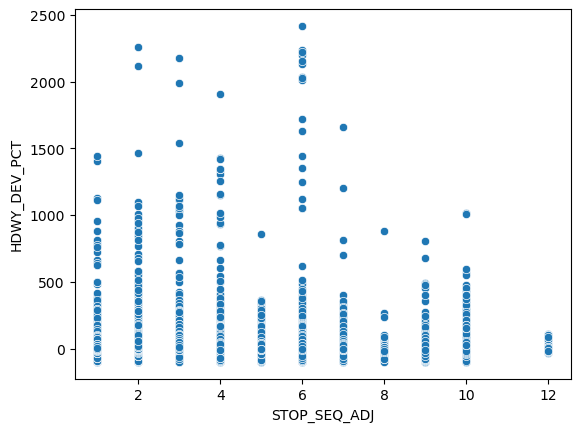

In [18]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT');

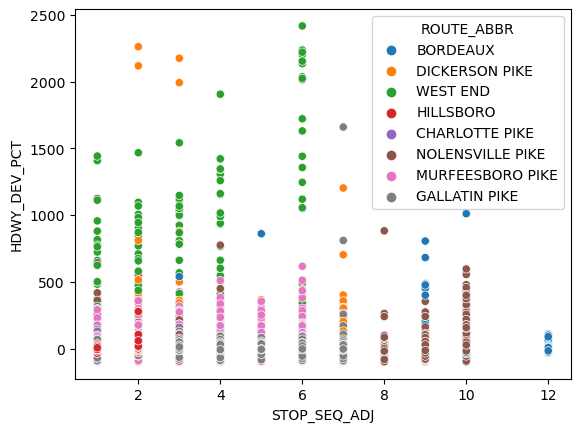

In [19]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV_PCT',hue='ROUTE_ABBR');

In [20]:
headway_df_adj['STOP_SEQ_ADJ_RANK'] = headway_df_adj.groupby(['CORRECTED_TRIP_ID'])['STOP_SEQ_ADJ'].rank('max').copy()

In [21]:
headway_df_adj[headway_df_adj['TRIP_ID']==345104].iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
6461,120230802,1,99491784,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-02 04:42:00,2023-08-02 04:34:38,2023-08-02 04:44:27,-2.450000,NaN
6462,120230802,1,99491785,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-02 04:46:00,2023-08-02 04:49:00,2023-08-02 04:49:00,-3.000000,NaN
6463,120230802,1,99491786,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-02 04:54:00,2023-08-02 04:54:19,2023-08-02 04:54:19,-0.316666,NaN
6464,120230802,1,99491787,2023-08-02,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-02 05:10:00,2023-08-02 05:01:59,2023-08-02 05:01:59,8.016666,NaN
12911,120230803,1,99525645,2023-08-03,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-03 04:42:00,2023-08-03 04:04:39,2023-08-03 04:42:46,-0.766666,NaN
12912,120230803,1,99525646,2023-08-03,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-03 04:46:00,2023-08-03 04:47:03,2023-08-03 04:47:03,-1.050000,NaN


In [22]:
len(headway_df_adj)

350328

In [23]:
headway_df_adj.iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN
5,120230801,1,99457895,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN
6,120230801,1,99457896,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0


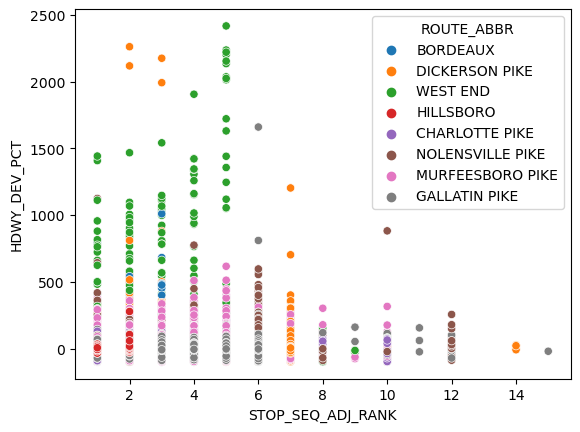

In [24]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ_RANK', y='HDWY_DEV_PCT', hue='ROUTE_ABBR');

In [25]:
headway_df_adj[(headway_df_adj['STOP_SEQ_ADJ_RANK']==15) & (headway_df_adj['ROUTE_ABBR']=='GALLATIN PIKE')].iloc[:,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
325747,120230926,1,100285737,2023-09-26,GALLATIN PIKE,5606,1713,353036,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-26 13:03:00,2023-09-26 13:21:58,2023-09-26 13:21:58,-18.966666,10.0
325790,120230926,1,100285781,2023-09-26,GALLATIN PIKE,5606,1389,353036,1,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-26 13:03:00,NaT,NaT,NaN,10.0
325797,120230926,1,100285788,2023-09-26,GALLATIN PIKE,5606,1389,353036,2,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-26 13:03:00,NaT,NaT,NaN,10.0


In [26]:
type(headway_df_adj['ACTUAL_DEPARTURE_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
headway_df_adj['TIME_SINCE_ACTUAL_START'] = (pd.Series(headway_df_adj['ACTUAL_DEPARTURE_TIME'].dt.to_pydatetime())-pd.Series(headway_df_adj['ROUTE_ACTUAL_START'].dt.to_pydatetime())).dt.total_seconds()/60
headway_df_adj['TIME_SINCE_SCHED_START'] = (pd.Series(headway_df_adj['ACTUAL_DEPARTURE_TIME'].dt.to_pydatetime())-pd.Series(headway_df_adj['ROUTE_SCHED_START'].dt.to_pydatetime())).dt.total_seconds()/60

#First attempt at adjusting for miscalculated time difference values due to overnight change in date
#headway_df_adj.loc[headway_df_adj['TIME_SINCE_ACTUAL_START'] < -50000, 'TIME_SINCE_ACTUAL_START'] = 86400+headway_df_adj['TIME_SINCE_ACTUAL_START']
#headway_df_adj.loc[headway_df_adj['TIME_SINCE_SCHED_START'] < -50000, 'TIME_SINCE_SCHED_START'] = 86400+headway_df_adj['TIME_SINCE_SCHED_START']

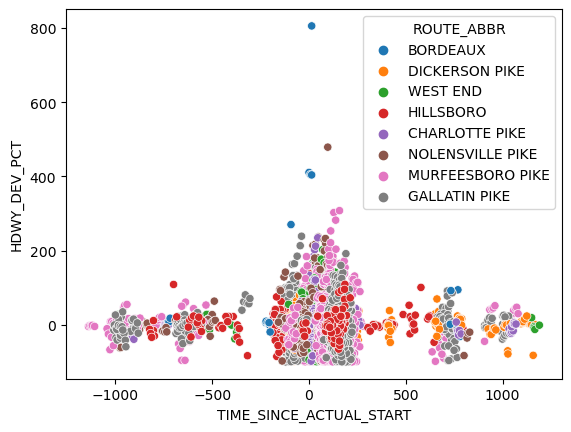

In [28]:
sns.scatterplot(data=headway_df_adj, x= 'TIME_SINCE_ACTUAL_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR');

In [29]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START']<0].head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,HDWY_DEV_PCT,STOP_SEQ_ADJ_RANK,TIME_SINCE_ACTUAL_START,TIME_SINCE_SCHED_START
4525,120230801,1,99463600,2023-08-01,MURFEESBORO PIKE,5506,2560,347791,1,FROM DOWNTOWN,...,55,LATE,5.0,2023-08-01 23:15:00,2023-08-01 23:47:34,1.0,65.500000,2.0,-15.033333,17.533333
4526,120230801,1,99463601,2023-08-01,MURFEESBORO PIKE,5506,2560,347791,1,FROM DOWNTOWN,...,55,LATE,5.0,2023-08-01 23:15:00,2023-08-01 23:47:34,2.0,37.000000,4.0,-3.883333,28.683333
6592,120230802,1,99491917,2023-08-02,BORDEAUX,2201,1617,345215,0,TO DOWNTOWN,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,1.0,5.851851,1.0,-222.383333,3.283333
6593,120230802,1,99491918,2023-08-02,BORDEAUX,2201,1617,345215,0,TO DOWNTOWN,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,2.0,4.782609,2.0,-211.166667,14.500000
6594,120230802,1,99491919,2023-08-02,BORDEAUX,2201,1617,345215,0,TO DOWNTOWN,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,3.0,0.181159,3.0,-204.900000,20.766667


In [30]:
headway_df_adj[headway_df_adj['TIME_SINCE_ACTUAL_START']<0].iloc[0:50,15:]

,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,...,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,HDWY_DEV_PCT,STOP_SEQ_ADJ_RANK,TIME_SINCE_ACTUAL_START,TIME_SINCE_SCHED_START
4525,2023-08-01 23:15:00,2023-08-01 23:32:32,2023-08-01 23:32:32,-17.533333,20.0,33.100000,13.100000,0,1,0,...,55,LATE,5.0,2023-08-01 23:15:00,2023-08-01 23:47:34,1.0,65.500000,2.0,-15.033333,17.533333
4526,2023-08-01 23:26:00,2023-08-01 23:43:41,2023-08-01 23:43:41,-17.683333,20.0,27.400000,7.400000,0,1,0,...,55,LATE,5.0,2023-08-01 23:15:00,2023-08-01 23:47:34,2.0,37.000000,4.0,-3.883333,28.683333
6592,2023-08-02 06:00:00,2023-08-02 06:03:17,2023-08-02 06:03:17,-3.283333,45.0,47.633333,2.633333,0,0,1,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,1.0,5.851851,1.0,-222.383333,3.283333
6593,2023-08-02 06:10:00,2023-08-02 06:14:30,2023-08-02 06:14:30,-4.500000,46.0,48.200000,2.200000,0,0,1,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,2.0,4.782609,2.0,-211.166667,14.500000
6594,2023-08-02 06:17:00,2023-08-02 06:20:46,2023-08-02 06:20:46,-3.766666,46.0,46.083333,0.083333,0,0,1,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,3.0,0.181159,3.0,-204.900000,20.766667
6595,2023-08-02 06:24:00,2023-08-02 06:28:11,2023-08-02 06:28:11,-4.183333,15.0,16.400000,1.400000,0,0,1,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,5.0,9.333333,4.0,-197.483333,28.183333
6596,2023-08-02 06:40:00,2023-08-02 06:35:35,2023-08-02 06:35:35,4.416666,NaN,NaN,NaN,0,0,1,...,22,ON TIME,9.0,2023-08-02 06:00:00,2023-08-02 09:45:40,9.0,NaN,5.0,-190.083333,35.583333
6680,2023-08-02 09:45:00,2023-08-02 09:42:26,2023-08-02 09:45:40,-0.666666,45.0,166.616666,121.616666,0,0,1,...,22,ON TIME,9.0,2023-08-02 09:45:00,2023-08-02 11:18:38,1.0,270.259258,1.0,-92.966667,0.666667
6681,2023-08-02 09:55:00,2023-08-02 09:54:27,2023-08-02 09:54:27,0.550000,45.0,45.350000,0.350000,0,0,1,...,22,ON TIME,9.0,2023-08-02 09:45:00,2023-08-02 11:18:38,2.0,0.777778,2.0,-84.183333,9.450000
6682,2023-08-02 10:02:00,2023-08-02 10:03:19,2023-08-02 10:03:19,-1.316666,45.0,49.150000,4.150000,0,0,1,...,22,ON TIME,9.0,2023-08-02 09:45:00,2023-08-02 11:18:38,3.0,9.222222,3.0,-75.316667,18.316667


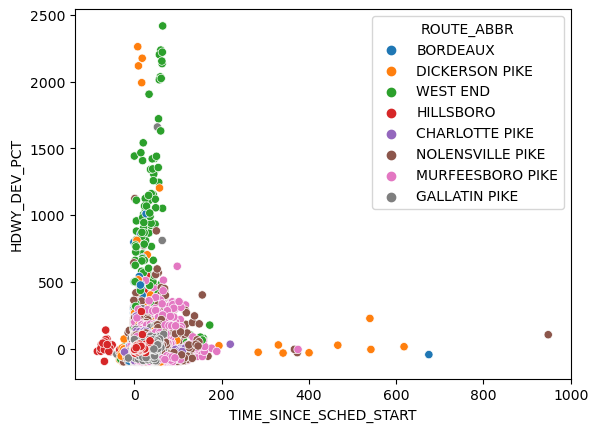

In [31]:
sns.scatterplot(data=headway_df_adj, x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT', hue='ROUTE_ABBR');

In [36]:
headway_df_adj[headway_df_adj['HDWY_DEV_PCT']>2200].iloc[:,25:]

,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,HDWY_DEV_PCT,STOP_SEQ_ADJ_RANK,TIME_SINCE_ACTUAL_START,TIME_SINCE_SCHED_START
46637,0,0.0,0,2,0.000000,2023-08-08 - 353988,55,ON TIME,7.0,2023-08-08 15:12:00,NaT,1.0,inf,1.0,NaN,2.216667
46643,0,0.0,0,2,2.866666,2023-08-08 - 354106,56,ON TIME,7.0,2023-08-08 15:20:00,NaT,1.0,inf,1.0,NaN,3.566667
48742,0,0.0,0,2,56.283333,2023-08-09 - 351236,50,ON TIME,10.0,2023-08-09 15:10:00,NaT,1.0,inf,1.0,NaN,1.533333
55175,0,0.0,0,91,0.000000,2023-08-10 - 351225,3,LATE,2.0,2023-08-10 15:02:00,NaT,6.0,2236.666650,5.0,NaN,60.783333
55236,0,0.0,0,2,0.000000,2023-08-10 - 351236,50,ON TIME,10.0,2023-08-10 15:10:00,NaT,1.0,inf,1.0,NaN,0.466667
55250,0,0.0,0,2,20.266666,2023-08-10 - 351239,56,ON TIME,7.0,2023-08-10 15:20:00,NaT,1.0,inf,1.0,NaN,2.900000
61749,0,0.0,0,2,0.000000,2023-08-11 - 351236,50,ON TIME,10.0,2023-08-11 15:10:00,NaT,1.0,inf,1.0,NaN,0.400000
76138,0,0.0,0,2,25.366666,2023-08-14 - 351239,56,EARLY,7.0,2023-08-14 15:20:00,NaT,1.0,inf,1.0,NaN,-1.066667
95638,0,0.0,0,2,17.233333,2023-08-17 - 351236,50,LATE,10.0,2023-08-17 15:10:00,NaT,1.0,inf,1.0,NaN,9.400000
99700,0,0.0,0,2,3.966666,2023-08-17 - 353246,55,ON TIME,7.0,2023-08-17 15:12:00,NaT,1.0,inf,1.0,NaN,3.383333


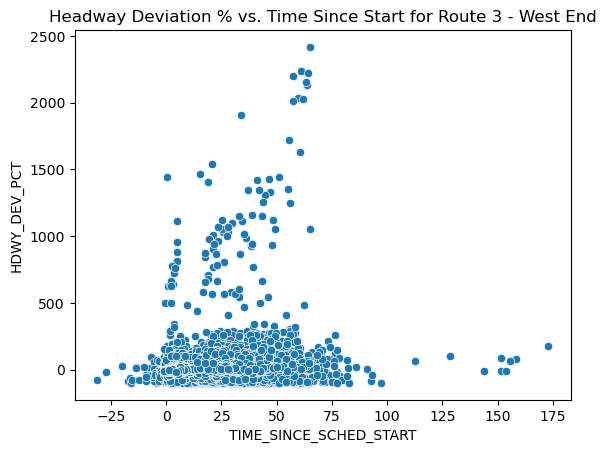

In [41]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='WEST END'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 3 - West End');

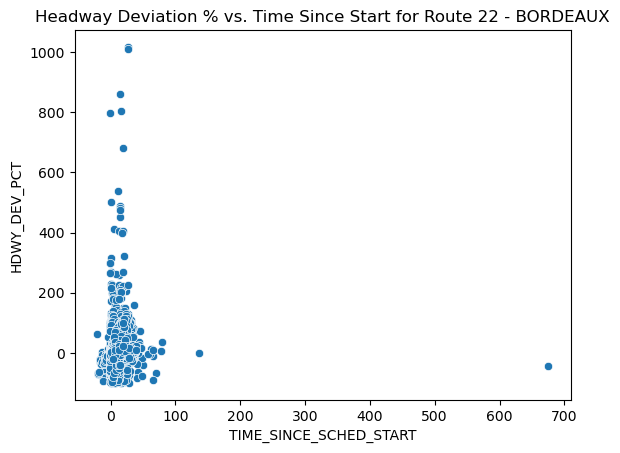

In [42]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='BORDEAUX'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 22 - BORDEAUX');

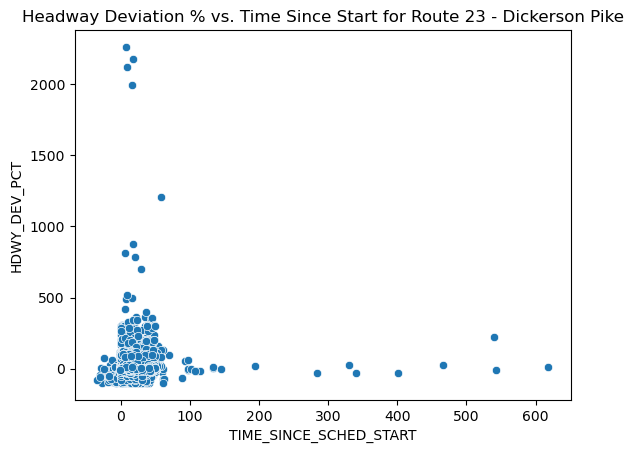

In [43]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='DICKERSON PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 23 - Dickerson Pike');

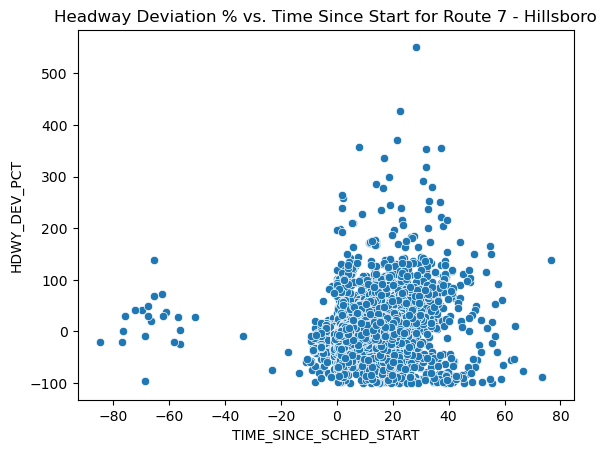

In [44]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='HILLSBORO'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 7 - Hillsboro');

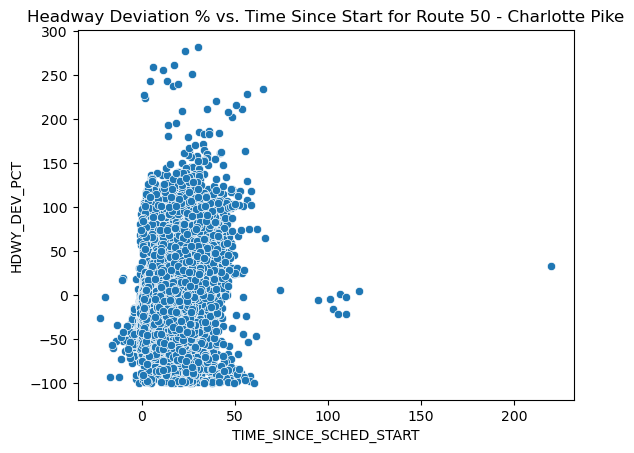

In [45]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='CHARLOTTE PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 50 - Charlotte Pike');

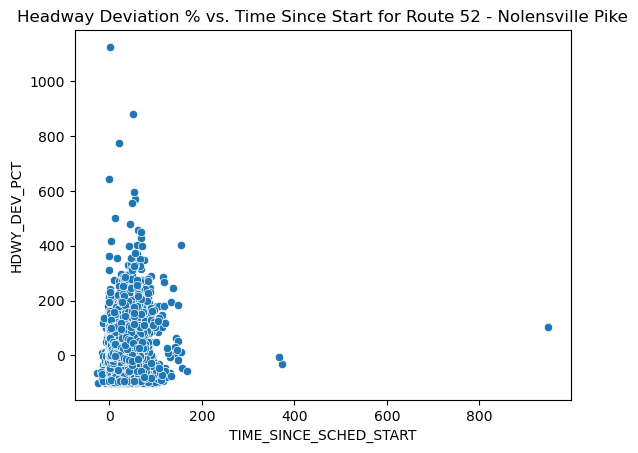

In [46]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='NOLENSVILLE PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 52 - Nolensville Pike');

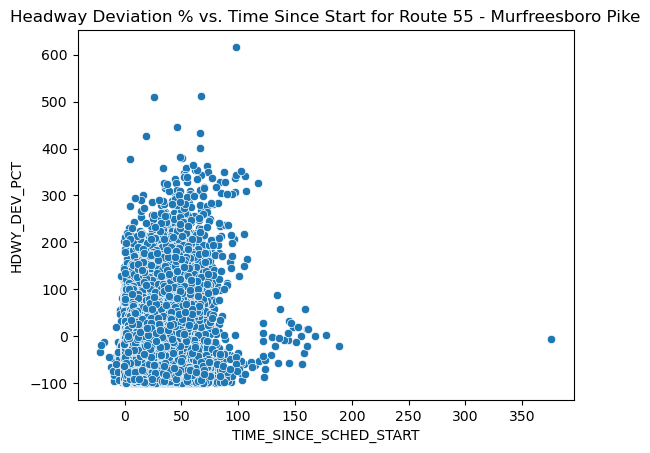

In [48]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='MURFEESBORO PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 55 - Murfreesboro Pike');

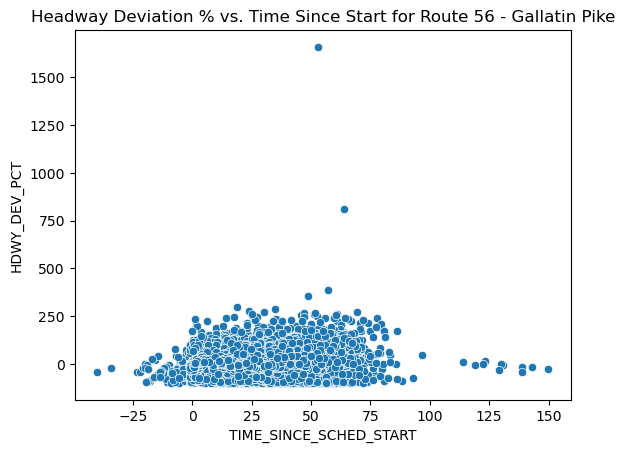

In [49]:
sns.scatterplot(data=headway_df_adj[headway_df_adj['ROUTE_ABBR']=='GALLATIN PIKE'], x= 'TIME_SINCE_SCHED_START', y='HDWY_DEV_PCT').set(title='Headway Deviation % vs. Time Since Start for Route 56 - Gallatin Pike');